In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import the financialmodelingprep API key
from config import financial_api_key

In [2]:
# Set the API base URL
#https://https://financialmodelingprep.com/api/v3/balance-sheet-statement/AAPL?period=quarter&limit=400&apikey=
base_url = "https://financialmodelingprep.com/api/v3/balance-sheet-statement/"
SYM = 'AAPL'
query_url = f"{base_url}{SYM}?period=quarter?apikey={financial_api_key}"
print(query_url)

#https://financialmodelingprep.com/api/v3/financial-statement-full-as-reported/ALK?apikey=
#https://financialmodelingprep.com/api/v3/financial-statement-full-as-reported/AAPL?apikey=
#API Data provided by Financial Modeling Prep https://financialmodelingprep.com/developer/docs/

https://financialmodelingprep.com/api/v3/balance-sheet-statement/AAPL?period=quarter?apikey=90e712c3062ebab6be06de188b5c6b0a


In [3]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
washington_corporations = pd.read_csv("Resources/publiccompaniesandsectors.csv")

# Display sample data
washington_corporations

,Company Name,SYM,Sector
0,Alder BioPharmaceuticals Inc.,ALDR,BioTech & Pharma
1,Alaska Air Group Inc.,ALK,Airlines
2,Amazon com Inc.,AMZN,Retail and Ecommerce
3,Anchor Bancorp,ANCB,Banks
4,Aptevo Therapeutics Inc.,APVO,BioTech & Pharma
...,...,...,...
68,Aval,AVLR,Taxes
69,Columbia Banking Inc.,COLB,Banks
70,eXp World Inc.,EXPI,Real Estate Services
71,Mr Cooper Group Inc.,COOP,Insurance


In [4]:
#identify tickers needed from washington corportions dataframe
ticker_list= washington_corporations["SYM"]
#ticker_list

#Create an empty list to collect data from API pull
financial_data = []

#loop through api to fetch data for all Washington Corproations
for count, symbol in enumerate(ticker_list):
    symbol = str(symbol)
    #print(f'reading ticker {count} {symbol}') 
    #if count > 10:
        #print("DEBUT BREAK!")
        #break
    if symbol == 'nan':
        continue
    query_url=f"{base_url}{symbol}?period=quarter&apikey={financial_api_key}"
    #print(f'symbol={symbol}, query={query_url}')
    
    financial_statement_data = requests.get(query_url).json()[0]
    
    #print(financial_statement_data[0])
    #print(financial_statement_data[1])
    
    ticker = financial_statement_data['symbol']
    date = financial_statement_data['date']
    fillingDate = financial_statement_data['fillingDate']
    calendarYear = financial_statement_data['calendarYear']
    period = financial_statement_data ['period']
    cashAndCashEquivalents = financial_statement_data['cashAndCashEquivalents']
    shortTermInvestments = financial_statement_data['shortTermInvestments']
    cashAndShortTermInvestments = financial_statement_data['cashAndShortTermInvestments']
    netReceivables= financial_statement_data['netReceivables']
    inventory =  financial_statement_data['inventory']
    otherCurrentAssets =financial_statement_data['otherCurrentAssets']
    totalCurrentAssets = financial_statement_data['totalCurrentAssets']
    propertyPlantEquipmentNet = financial_statement_data ['propertyPlantEquipmentNet']
    goodwillAndIntangibleAssets = financial_statement_data['goodwillAndIntangibleAssets']
    longTermInvestments = financial_statement_data['longTermInvestments']
    taxAssets = financial_statement_data['taxAssets']
    otherNonCurrentAssets = financial_statement_data['otherNonCurrentAssets']
    totalNonCurrentAssets = financial_statement_data['totalNonCurrentAssets']
    otherAssets = financial_statement_data['otherAssets']
    totalAssets = financial_statement_data['totalAssets']
    accountPayables = financial_statement_data['accountPayables']
    shortTermDebt = financial_statement_data['shortTermDebt']
    taxPayables = financial_statement_data['taxPayables']
    deferredRevenue = financial_statement_data['deferredRevenue']
    totalLiabilities = financial_statement_data['totalLiabilities']
    retainedEarnings = financial_statement_data ['retainedEarnings']
    accumulatedOtherComprehensiveIncomeLoss = financial_statement_data['accumulatedOtherComprehensiveIncomeLoss']
    totalEquity = financial_statement_data['totalEquity']
    totalLiabilitiesAndTotalEquity = financial_statement_data['totalLiabilitiesAndTotalEquity']
    totalInvestments = financial_statement_data['totalInvestments']
    totalDebt = financial_statement_data['totalDebt']
    netDebt = financial_statement_data['netDebt']
    
   #append to list
    financial_data.append({"Ticker":symbol,
                           "Date": date,
                           "Filing Date": fillingDate,
                           "Calendar Year": calendarYear,
                           "Period": period,
                           "Cash & Cash Equivalents": cashAndCashEquivalents,
                           "Net Receivables": netReceivables,
                           "Inventory": inventory,
                           "Other Current Assets": otherCurrentAssets,
                           "Total Current Assets": totalCurrentAssets,
                           "Property, Plant & Equip Net" : propertyPlantEquipmentNet,
                           "Goodwill & Intangible Assets": goodwillAndIntangibleAssets, 
                           "Long Term Investments": longTermInvestments, 
                           "Tax Assets": taxAssets, 
                           "Other NonCurrent Assets": otherNonCurrentAssets, 
                           "Total NonCurrent Assets": totalNonCurrentAssets, 
                           "Other Assets": otherAssets,
                           "Total Asstes": totalAssets, 
                           "Acct Payables": accountPayables,
                           "Short-term Debt": shortTermDebt,
                           "Tax Payables": taxPayables,
                           "Deferred Revenue": deferredRevenue, 
                           "Total Liabilities": totalLiabilities,
                           "Retained Earnings": retainedEarnings,
                           "Accumulated Other Comprehensive Income Loss": accumulatedOtherComprehensiveIncomeLoss,
                           "Total Equity": totalEquity,
                           "Total Liabilities": totalLiabilitiesAndTotalEquity,
                           "Total Investments": totalInvestments,
                           "Total Debt": totalDebt, 
                           "Net Debt": netDebt
                          })

                           
#covert the financial data into a dataframe
financial_data = pd.DataFrame.from_dict(financial_data)
financial_data
#financial_data.to_csv("Resources/stocktickerdata.csv")
    

,Ticker,Date,Filing Date,Calendar Year,Period,Cash & Cash Equivalents,Net Receivables,Inventory,Other Current Assets,Total Current Assets,...,Short-term Debt,Tax Payables,Deferred Revenue,Total Liabilities,Retained Earnings,Accumulated Other Comprehensive Income Loss,Total Equity,Total Investments,Total Debt,Net Debt
0,ALDR,2019-06-30,2019-08-06,2019,Q2,88378000,0,0,42361000,451672000,...,981000,0,0,462567000,-1140283000,-49000,110305000,320933000,5042000,-83336000
1,ALK,2022-12-31,2023-02-13,2022,Q4,338000000,296000000,104000000,223000000,3040000000,...,504000000,0,1123000000,14186000000,4300000000,-388000000,0,0,3780000000,3442000000
2,AMZN,2022-12-31,2023-02-03,2022,Q4,53888000000,42360000000,34405000000,0,146791000000,...,0,0,13227000000,462675000000,83193000000,-4487000000,146043000000,0,140118000000,86230000000
3,ANCB,2018-09-30,2018-09-30,2019,Q1,50546000,1424000,0,0,0,...,0,0,0,478880000,48063000,-1232000,68676000,0,37000000,-13546000
4,APVO,2022-09-30,2022-11-10,2022,Q3,22150000,0,0,2468000,24618000,...,2000000,0,0,31695000,-201394000,0,15762000,0,10147000,-12003000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,AVLR,2022-06-30,2022-08-09,2022,Q2,1460594000,117412000,0,134830000,1712836000,...,12076000,4281000,307477000,2644468000,-791274000,-8386000,1026340000,0,1018725000,-441869000
66,COLB,2022-12-31,2022-12-31,2022,Q4,291741000,64908000,0,0,0,...,0,0,0,20265843000,850011000,-510495000,2213153000,11226415000,974625000,682884000
67,EXPI,2022-09-30,2022-11-02,2022,Q3,134545000,119822000,0,65819000,320186000,...,202000,0,52652000,439698000,34616000,-1474000,255894000,0,922000,-133623000
68,COOP,2022-09-30,2022-10-26,2022,Q3,530000000,831000000,0,1729000000,3090000000,...,3070000000,0,0,12815000000,3801000000,0,4105000000,0,5743000000,5213000000


In [5]:
year_2022 = financial_data[(financial_data["Calendar Year"] == "2022")]
year_2021 = financial_data[(financial_data["Calendar Year"] == "2021")]
year_2020 = financial_data[(financial_data["Calendar Year"] == "2020")]
year_2019 = financial_data[(financial_data["Calendar Year"] == "2019")]
year_2018 = financial_data[(financial_data["Calendar Year"] == "2018")]
year_2022.head()

,Ticker,Date,Filing Date,Calendar Year,Period,Cash & Cash Equivalents,Net Receivables,Inventory,Other Current Assets,Total Current Assets,...,Short-term Debt,Tax Payables,Deferred Revenue,Total Liabilities,Retained Earnings,Accumulated Other Comprehensive Income Loss,Total Equity,Total Investments,Total Debt,Net Debt
1,ALK,2022-12-31,2023-02-13,2022,Q4,338000000,296000000,104000000,223000000,3040000000,...,504000000,0,1123000000,14186000000,4300000000,-388000000,0,0,3780000000,3442000000
2,AMZN,2022-12-31,2023-02-03,2022,Q4,53888000000,42360000000,34405000000,0,146791000000,...,0,0,13227000000,462675000000,83193000000,-4487000000,146043000000,0,140118000000,86230000000
4,APVO,2022-09-30,2022-11-10,2022,Q3,22150000,0,0,2468000,24618000,...,2000000,0,0,31695000,-201394000,0,15762000,0,10147000,-12003000
5,ATOS,2022-09-30,2022-11-07,2022,Q3,117367000,610000,0,5418000,123395000,...,0,0,0,126724000,-148703000,-54000,123856000,0,0,-117367000
6,AVA,2022-09-30,2022-11-01,2022,Q3,14363000,188548000,123447000,137246000,463604000,...,281500000,40579000,0,7055799000,766624000,-10218000,2234849000,0,2724855000,2710492000


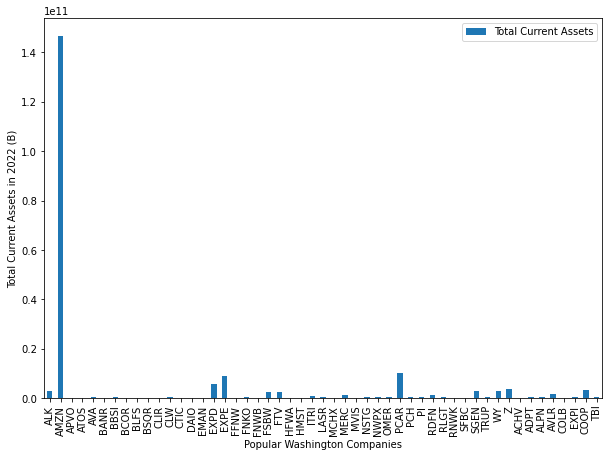

In [8]:
#show total current assets of each company in 2022. 
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = False
year_2022.plot(kind='bar', x='Ticker', y='Total Current Assets')
plt.xlabel("Popular Washington Companies")
plt.ylabel("Total Current Assets in 2022 (B)")
plt.savefig("TOTALcurrentassets2022.png")


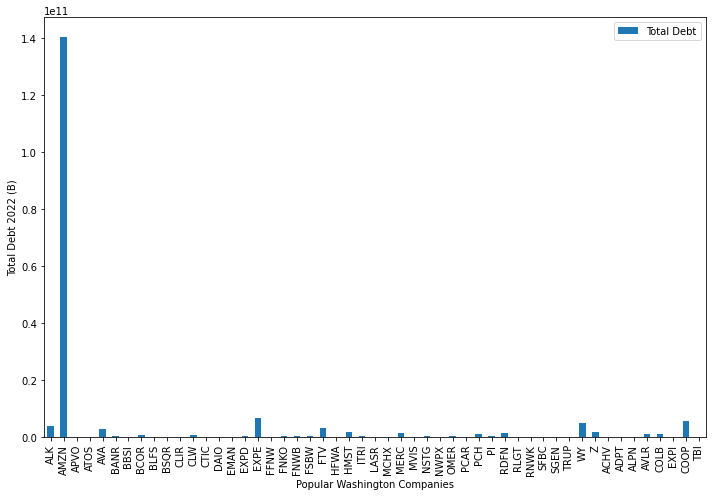

In [9]:
#total debt of each company in 2022
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
year_2022.plot(kind='bar', x='Ticker', y='Total Debt')
plt.xlabel("Popular Washington Companies")
plt.ylabel("Total Debt 2022 (B)")
plt.savefig("TotalDebt2022.png")

In [28]:
#show total current assets of each company in 2021. 
#zero results in 2021
#3 results in 2019.